In [87]:
# pip3 install plotly

In [88]:
# py -m pip install plotly

# px.scatter

# px.scatter – bubble chart

In [1]:
import plotly.express as px
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df_iris = px.data.iris()
df_iris.sample(1)

sepal_length  sepal_width  petal_length  petal_width    species  \
126           6.2          2.8           4.8          1.8  virginica   

     species_id  
126           3

Setting size and color with column names
Scatter plots with variable-sized circular markers are often known as bubble charts. Note that color and size data are added to hover information. You can add other columns to hover data with the hover_data argument of px.scatter.

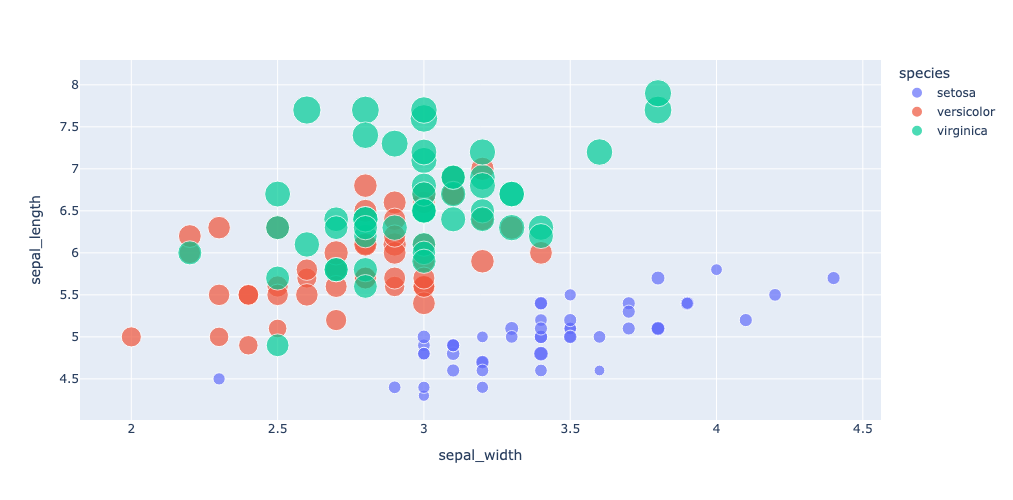

In [91]:
fig = px.scatter(df_iris, x="sepal_width", y="sepal_length", 
                 color="species", width=800, height=500,
                 size='petal_length', hover_data=['petal_width'])
fig.show()

# Discrete Color with Plotly Express

Most Plotly Express functions accept a color argument which automatically assigns data values to discrete colors if the data is non-numeric. If the data is numeric, the color will automatically be considered continuous. This means that numeric strings must be parsed to be used for continuous color, and conversely, numbers used as category codes must be converted to strings.

In [22]:
tips = px.data.tips()
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


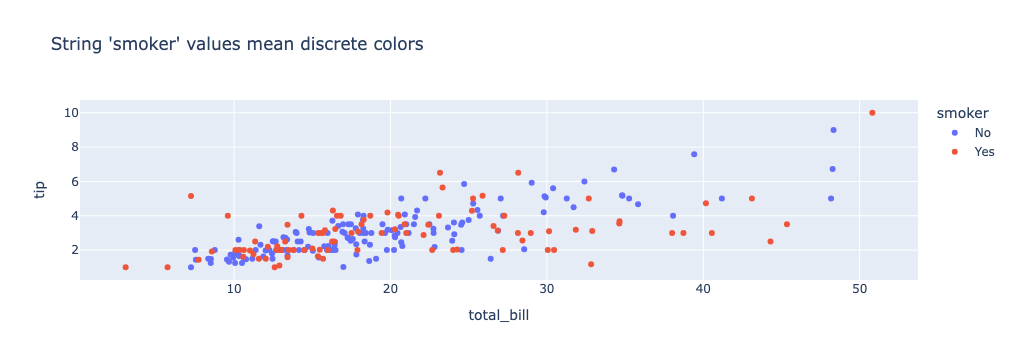

In [23]:
fig = px.scatter(tips, x="total_bill", y="tip", 
                 color="smoker",
  title="String 'smoker' values mean discrete colors")
fig.show()

# Numeric value "size" means continuous color

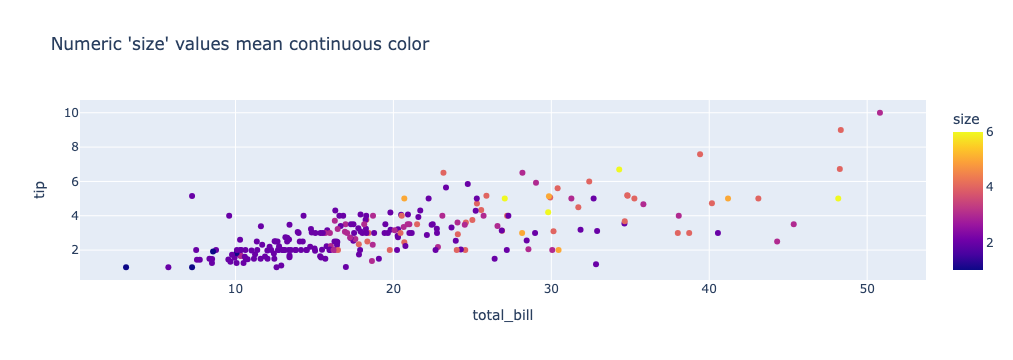

In [24]:
fig = px.scatter(tips, x="total_bill", y="tip", color="size",
                 title="Numeric 'size' values mean continuous color")
fig.show()

# The symbol argument can be mapped to a column as well

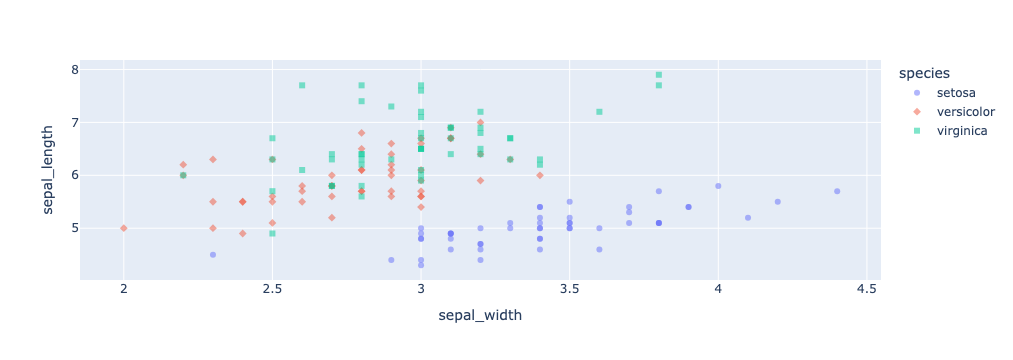

In [4]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color="species", symbol="species", opacity=0.5)
fig.show()

# Customized symbol with .update_traces( )

Styling Markers in Python
https://plotly.com/python/marker-style/

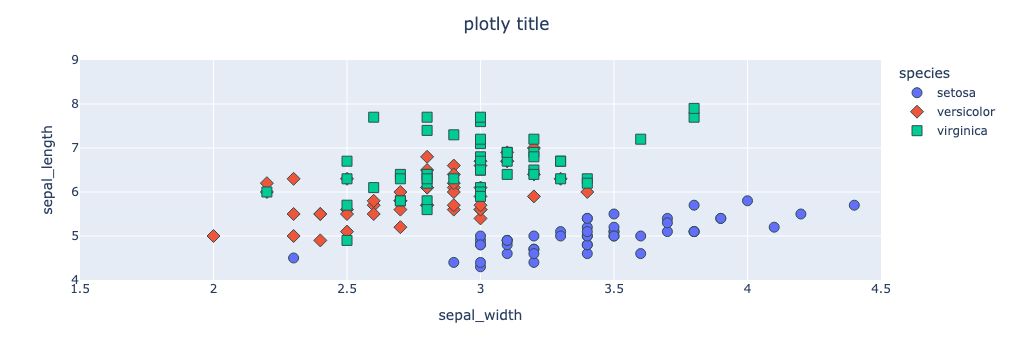

In [25]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color="species", symbol="species").update_traces(
                marker=dict(size=10, line=dict(width=1, 
                color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(
    title='plotly title', title_x=0.5,
    xaxis=dict(range=[1.5, 4.5]),  # Set x-axis range from 1.5 to 4.5
    yaxis=dict(range=[4, 9])   # Set y-axis range from 4 to 9
)
fig.show()

# Linear Regression Line (OLS)

In [26]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


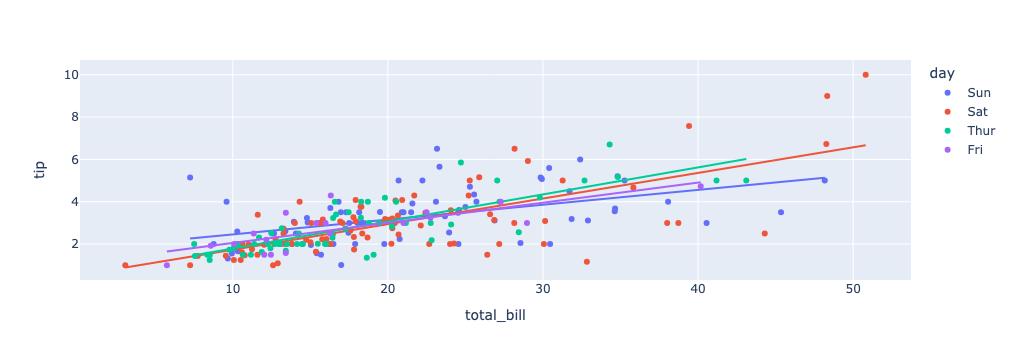

In [27]:
fig = px.scatter(tips, x="total_bill", y="tip", color="day", trendline="ols")
fig.show()

In [28]:
import pandas as pd
df_gold = pd.read_csv("gold_goldstock.csv")
df_gold["Date"] = pd.to_datetime(df_gold['Date'], dayfirst=True)  
df_gold = df_gold.set_index('Date')

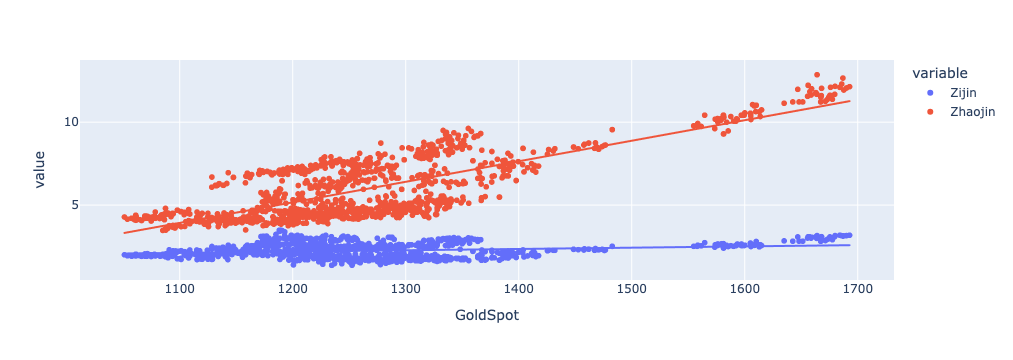

In [29]:
fig = px.scatter(df_gold, x="GoldSpot", 
        y=["Zijin","Zhaojin"],  trendline="ols" )
fig.show()

In [16]:
import numpy as np
df_gold = pd.read_csv("gold_goldstock.csv")
df_gold["Date"] = pd.to_datetime(df_gold['Date'], dayfirst=True)  
df_gold = df_gold.set_index('Date')
df_gold['GoldLogRtn'] = np.log(df_gold['GoldSpot']/df_gold['GoldSpot'].shift(1))
df_gold['ZijinLogRtn'] = np.log(df_gold['Zijin']/df_gold['Zijin'].shift(1))
df_gold['ZhaojinLogRtn'] = np.log(df_gold['Zhaojin']/df_gold['Zhaojin'].shift(1))
df_gold.dropna(inplace=True)
df_gold.head(2)

GoldSpot  Zijin  Zhaojin  GoldLogRtn  ZijinLogRtn  ZhaojinLogRtn
Date                                                                        
2013-01-02   1686.89   3.13    12.66    0.006524     0.025891       0.045242
2013-01-03   1663.99   3.16    12.86   -0.013668     0.009539       0.015674

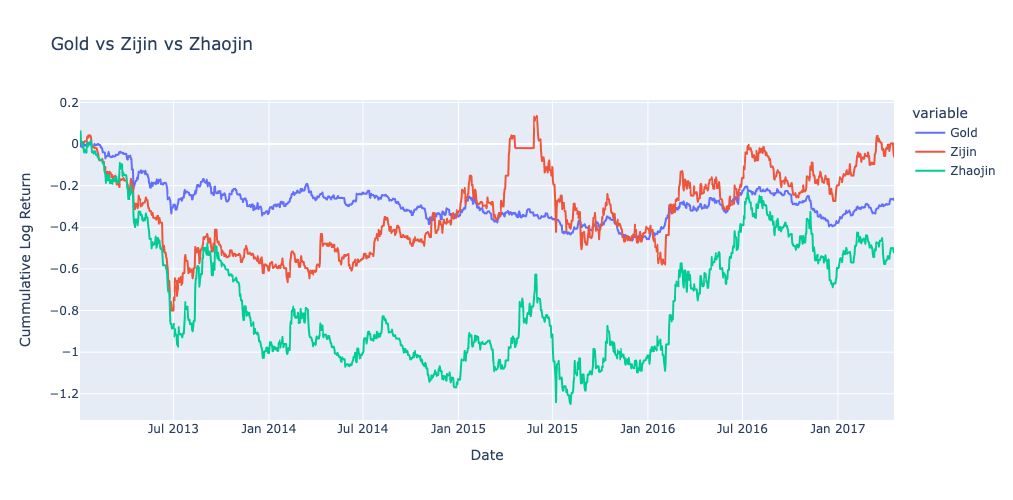

In [17]:
fig = px.line(df_gold, x=df_gold.index, y=[df_gold['GoldLogRtn'].cumsum(),
                                           df_gold['ZijinLogRtn'].cumsum(),
                                           df_gold['ZhaojinLogRtn'].cumsum()  ],
              title='Gold vs Zijin vs Zhaojin', width=800, height=500)
fig.update_traces({'name': 'Gold'}, selector={'name': 'wide_variable_0'})
fig.update_traces({'name': 'Zijin'}, selector={'name': 'wide_variable_1'})
fig.update_traces({'name': 'Zhaojin'}, selector={'name': 'wide_variable_2'})
fig.update_layout(xaxis_title='Date', yaxis_title='Cummulative Log Return')
fig.show()

In [18]:
close1 = np.array([1, 1.01, 0.95])
np.cumprod(close1)

array([1.    , 1.01  , 0.9595])

In [19]:
1 * 1.01 * 0.95

0.9594999999999999

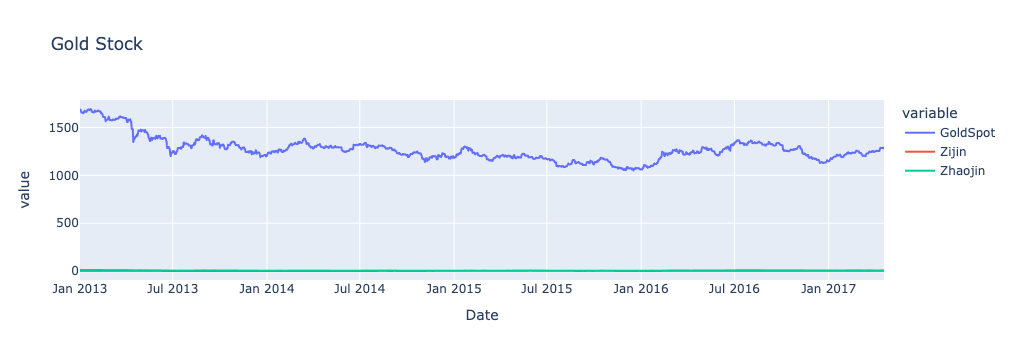

In [30]:
fig = px.line(df_gold, x=df_gold.index, y=["GoldSpot","Zijin","Zhaojin"], title="Gold Stock")
fig.show()

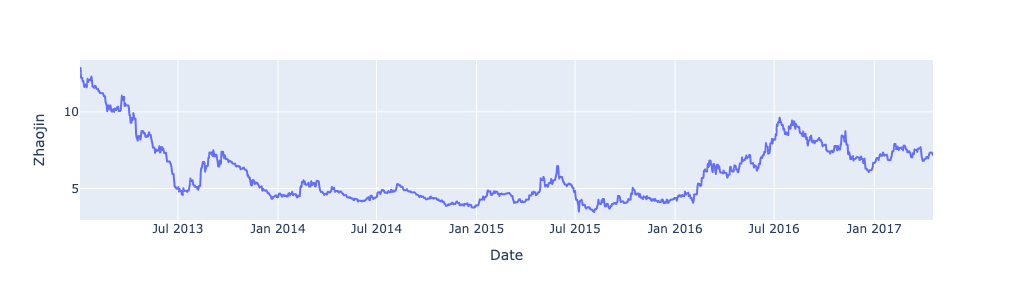

In [106]:
px.line(df_gold, x = df_gold.index, y = 'Zhaojin', height = 300)

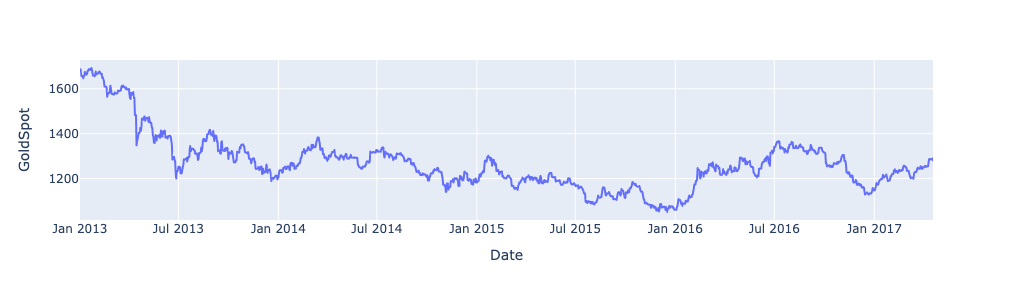

In [31]:
px.line(df_gold, x = df_gold.index, y = 'GoldSpot', height = 300)

# Facet Plots

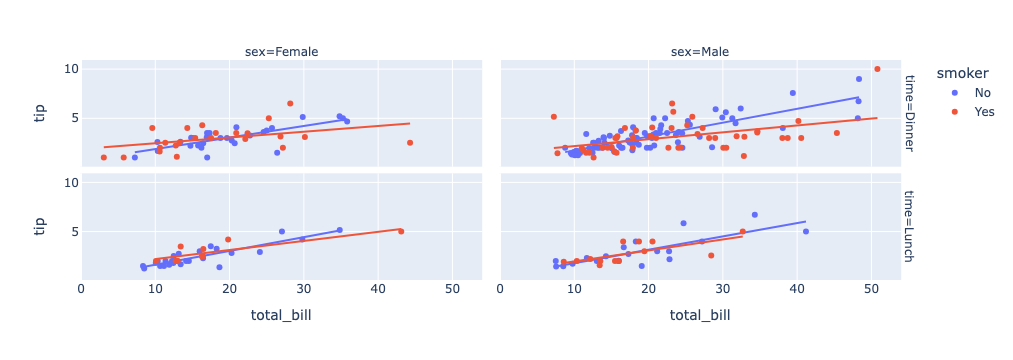

In [108]:
fig = px.scatter(tips, x="total_bill", y="tip", 
    color="smoker", facet_col="sex", facet_row="time", trendline='ols')
fig.show()

# px.box - Box plot

The exclusive algorithm uses the median to divide the ordered dataset into two halves. If the sample is odd, it does not include the median in either half. Q1 is then the median of the lower half and Q3 is the median of the upper half.

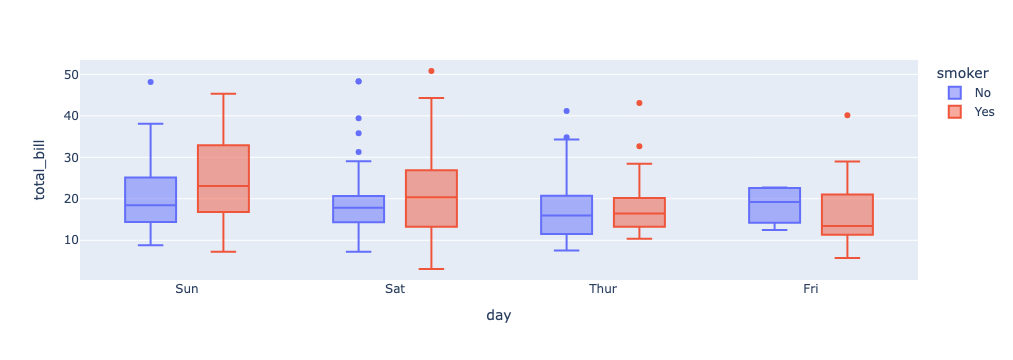

In [109]:
fig = px.box(tips, x="day", y="total_bill", color="smoker")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

# Facet plot

In [35]:
import yfinance as yf
goog = yf.download('GOOG', start='2025-01-01', end='2025-10-29', auto_adjust=True).droplevel('Ticker', axis=1)
goog['StandPrx'] = goog.Close / goog.Close.iloc[0]
goog['PrxRel'] = goog.Close / goog.Close.shift(1)
goog['SimpleRtn'] = goog.Close.pct_change(1)
goog['LogRtn'] = np.log(goog.Close/goog.Close.shift(1))
goog.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

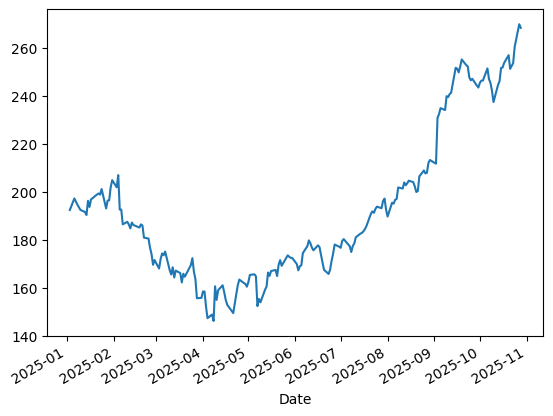

In [36]:
goog.Close.plot()

<Axes: xlabel='Date'>

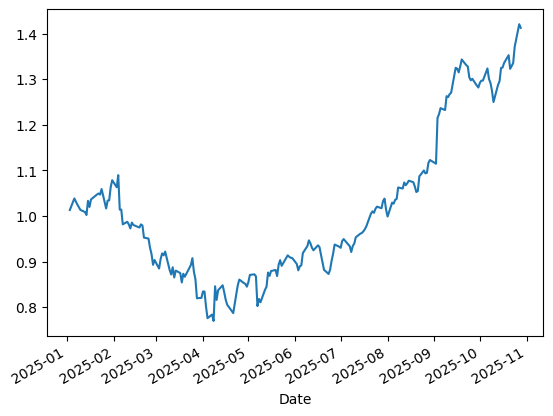

In [37]:
goog.PrxRel.cumprod().plot()

<Axes: xlabel='Date'>

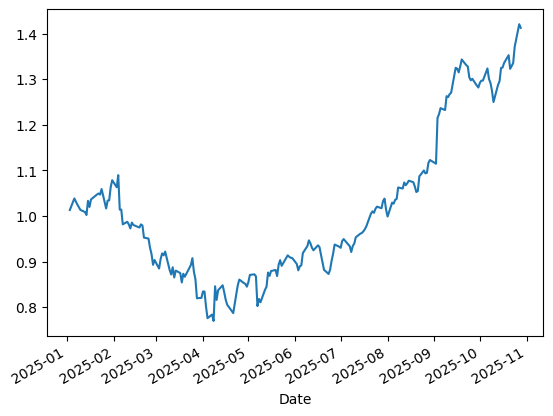

In [38]:
goog.StandPrx.plot()

In [167]:
# (goog['SimpleRtn']+1).cumprod().plot()

In [180]:
# goog['LogRtn'].cumsum().plot()

In [34]:
df_stock = px.data.stocks(indexed=True)
df_stock.head(5)

company         GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

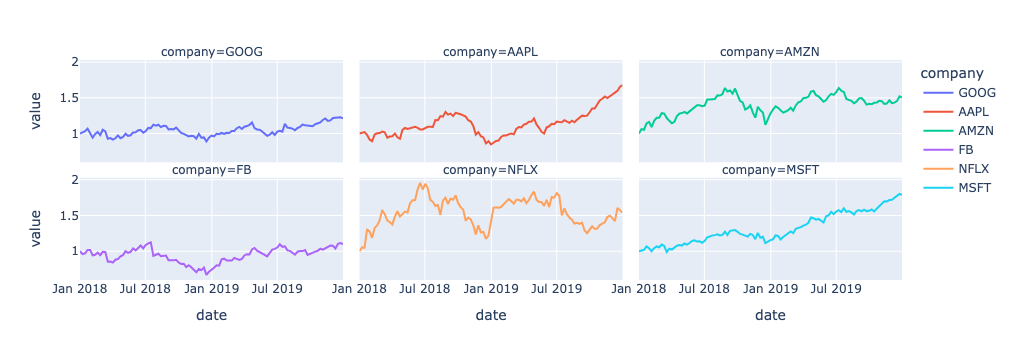

In [181]:
fig = px.line(df_stock, facet_col="company", facet_col_wrap=3)
fig.show()

# Adding Lines and Rectangles to Facet Plots

It is possible to add labelled horizontal and vertical lines and rectangles to facet plots using .add_hline(), .add_vline(), .add_hrect() or .add_vrect(). The default row and col values are "all" but this can be overridden, as with the rectangle below, which only appears in the first column.

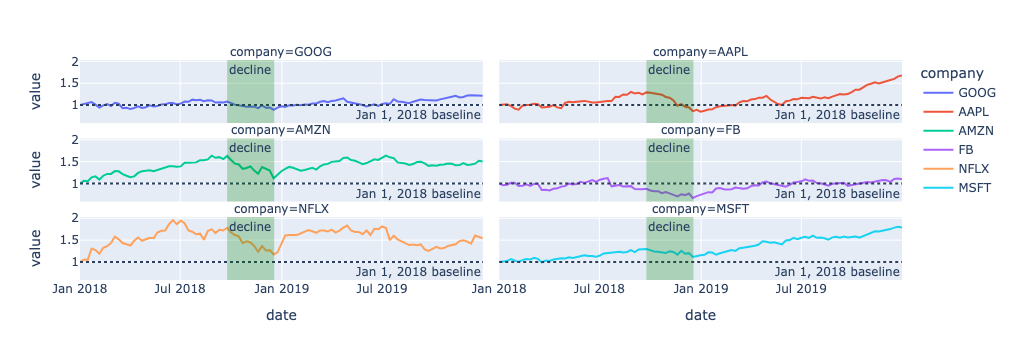

In [112]:
fig = px.line(df_stock, facet_col="company", facet_col_wrap=2)
fig.add_hline(y=1, line_dash="dot",
              annotation_text="Jan 1, 2018 baseline",
              annotation_position="bottom right")
fig.add_vrect(x0="2018-09-24", x1="2018-12-18",
              annotation_text="decline", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.show()

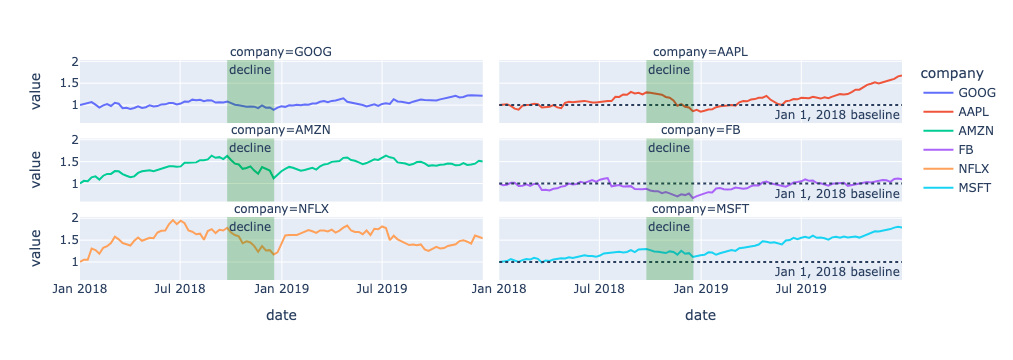

In [113]:
fig = px.line(df_stock, facet_col="company", facet_col_wrap=2)
fig.add_hline(y=1, line_dash="dot", col=2,
              annotation_text="Jan 1, 2018 baseline",
              annotation_position="bottom right")
fig.add_vrect(x0="2018-09-24", x1="2018-12-18", 
              annotation_text="decline", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.show()

In [212]:
tickers = ['GOOG','AAPL','AMZN']
df_all = yf.download(tickers, start='2025-01-01', end='2025-10-28', auto_adjust=True)
df_all
for t in tickers:
    df_all['StandPrx', t] = df_all['Close', t] / df_all['Close', t].iloc[0]
df_all[['StandPrx']].head(3)

[*********************100%***********************]  3 of 3 completed


Price       StandPrx                    
Ticker          GOOG      AAPL      AMZN
Date                                    
2025-01-02  1.000000  1.000000  1.000000
2025-01-03  1.013114  0.997991  1.018027
2025-01-06  1.038452  1.004716  1.033557

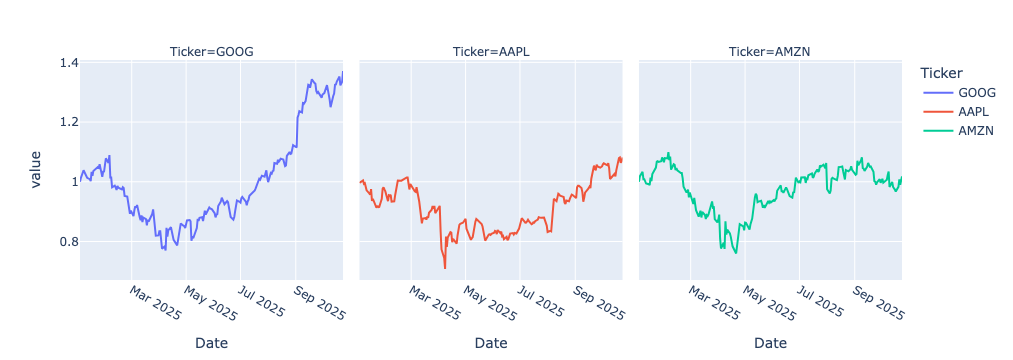

In [213]:
fig = px.line(df_all['StandPrx'], facet_col="Ticker", facet_col_wrap=3)
fig.show()    

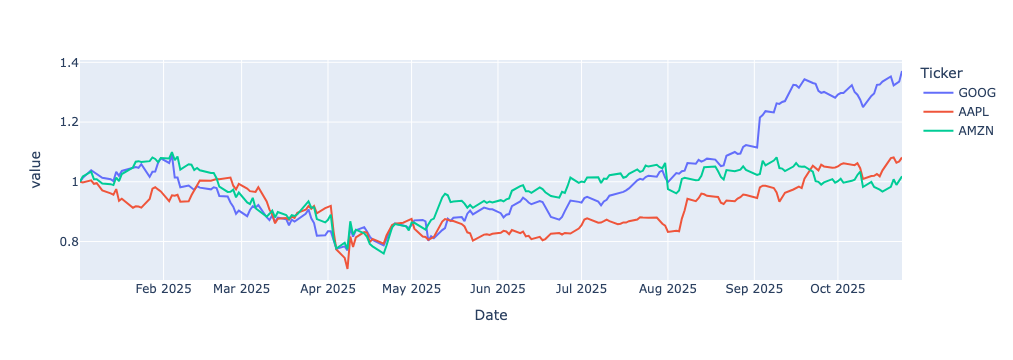

In [220]:
fig = px.line(df_all['StandPrx'])
fig.show() 

# Line plot

Styling Markers in Python https://plotly.com/python/marker-style/

In [256]:
df = px.data.gapminder() #.country=='China'
df.loc[(df.country=='China') | (df.country=='Japan')]

country continent  year   lifeExp         pop     gdpPercap iso_alpha  \
288   China      Asia  1952  44.00000   556263527    400.448611       CHN   
289   China      Asia  1957  50.54896   637408000    575.987001       CHN   
290   China      Asia  1962  44.50136   665770000    487.674018       CHN   
291   China      Asia  1967  58.38112   754550000    612.705693       CHN   
292   China      Asia  1972  63.11888   862030000    676.900092       CHN   
293   China      Asia  1977  63.96736   943455000    741.237470       CHN   
294   China      Asia  1982  65.52500  1000281000    962.421381       CHN   
295   China      Asia  1987  67.27400  1084035000   1378.904018       CHN   
296   China      Asia  1992  68.69000  1164970000   1655.784158       CHN   
297   China      Asia  1997  70.42600  1230075000   2289.234136       CHN   
298   China      Asia  2002  72.02800  1280400000   3119.280896       CHN   
299   China      Asia  2007  72.96100  1318683096   4959.114854       CHN   
792   Japan      Asia  1952  63.03000    86459025   3216.956347       JPN   
793   Japan      Asia  1957  65.50000    91563009   4317.694365       JPN   
794   Japan      Asia  1962  68.73000    95831757   6576.649461       JPN   
795   Japan      Asia  1967  71.43000   100825279   9847.788607       JPN   
796   Japan      Asia  1972  73.42000   107188273  14778.786360       JPN   
797   Japan      Asia  1977  75.38000   113872473  16610.377010       JPN   
798   Japan      Asia  1982  77.11000   118454974  19384.105710       JPN   
799   Japan      Asia  1987  78.67000   122091325  22375.941890       JPN   
800   Japan      Asia  1992  79.36000   124329269  26824.895110       JPN   
801   Japan      Asia  1997  80.69000   125956499  28816.584990       JPN   
802   Japan      Asia  2002  82.00000   127065841  28604.591900       JPN   
803   Japan      Asia  2007  82.60300   127467972  31656.068060       JPN   

     iso_num  
288      156  
289      156  
290      156  
291      156  
292      156  
293      156  
294      156  
295      156  
296      156  
297      156  
298      156  
299      156  
792      392  
793      392  
794      392  
795      392  
796      392  
797      392  
798      392  
799      392  
800      392  
801      392  
802      392  
803      392

In [259]:
df_life = px.data.gapminder().query("country == 'China' or country == 'Japan' ") 
df_life.sample(3)

country continent  year   lifeExp        pop    gdpPercap iso_alpha  \
793   Japan      Asia  1957  65.50000   91563009  4317.694365       JPN   
292   China      Asia  1972  63.11888  862030000   676.900092       CHN   
291   China      Asia  1967  58.38112  754550000   612.705693       CHN   

     iso_num  
793      392  
292      156  
291      156

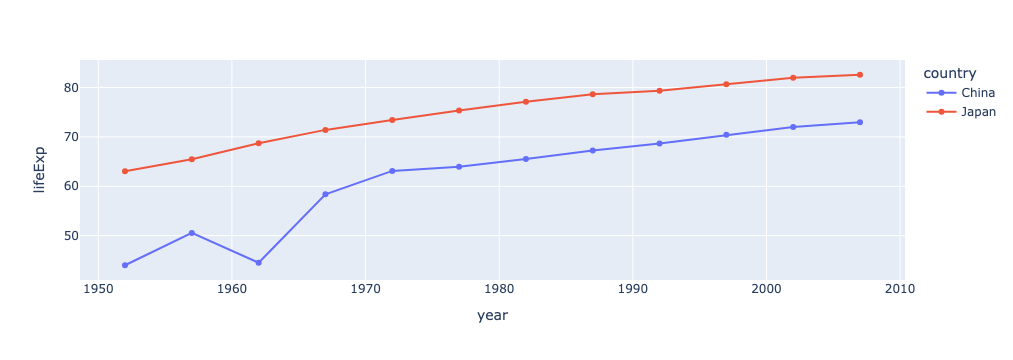

In [258]:
fig = px.line(df_life, x='year', y='lifeExp', color='country', markers=True)
fig.show()

# Line plot with Datetime index

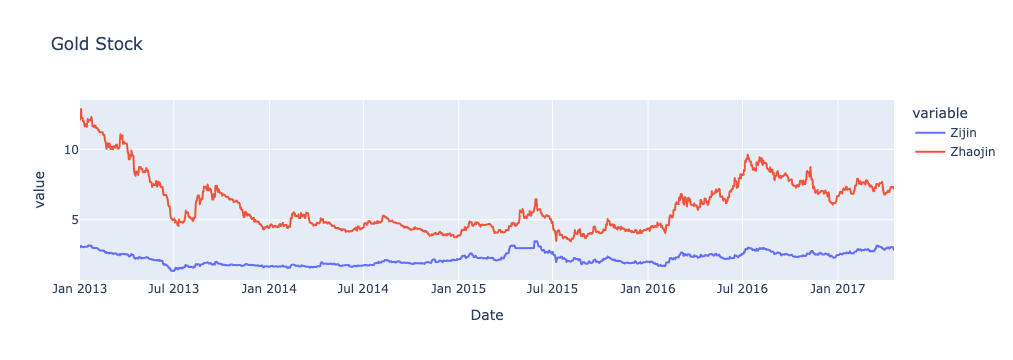

In [116]:
df_gold = pd.read_csv("gold_goldstock.csv")
df_gold["Date"] = pd.to_datetime(df_gold['Date'], dayfirst=True)  
df_gold = df_gold.set_index('Date')

fig = px.line(df_gold, x=df_gold.index, y=["Zijin","Zhaojin"], title="Gold Stock")
fig.show()

# Enable log scale for large range value

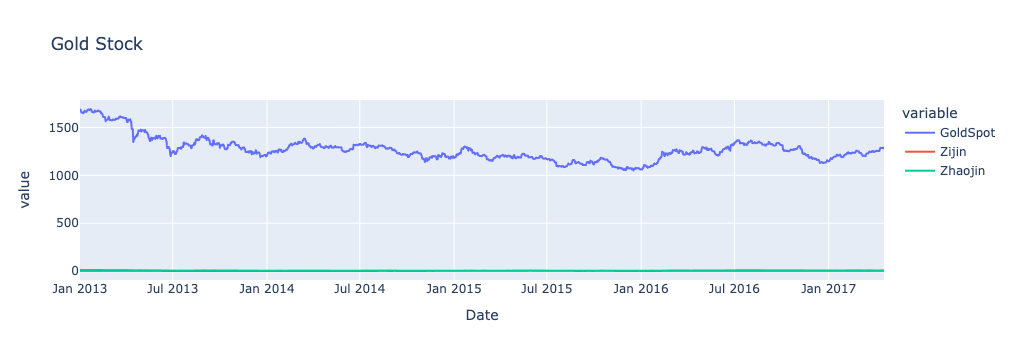

In [117]:
df_gold = pd.read_csv("gold_goldstock.csv")
df_gold["Date"] = pd.to_datetime(df_gold['Date'], dayfirst=True)  
df_gold = df_gold.set_index('Date')
fig = px.line(df_gold, x=df_gold.index, y=["GoldSpot","Zijin","Zhaojin"], title="Gold Stock") # log_y=True
fig.show()

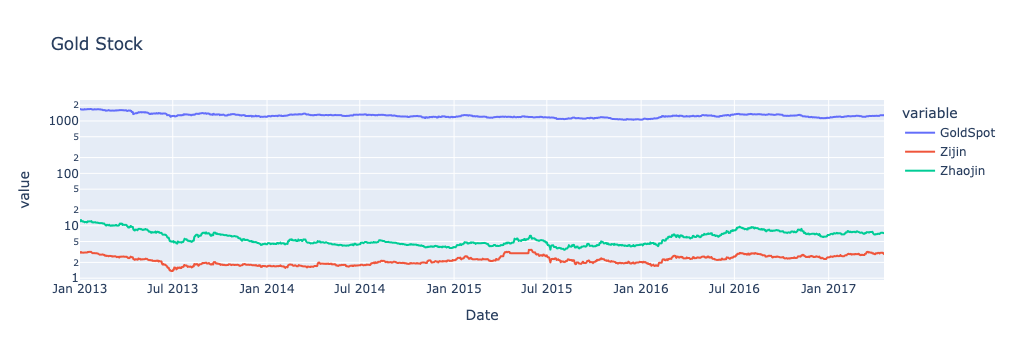

In [118]:
fig = px.line(df_gold, x=df_gold.index, y=["GoldSpot","Zijin","Zhaojin"], 
              log_y=True, title="Gold Stock")
fig.show()

# px.pie - Pie chart

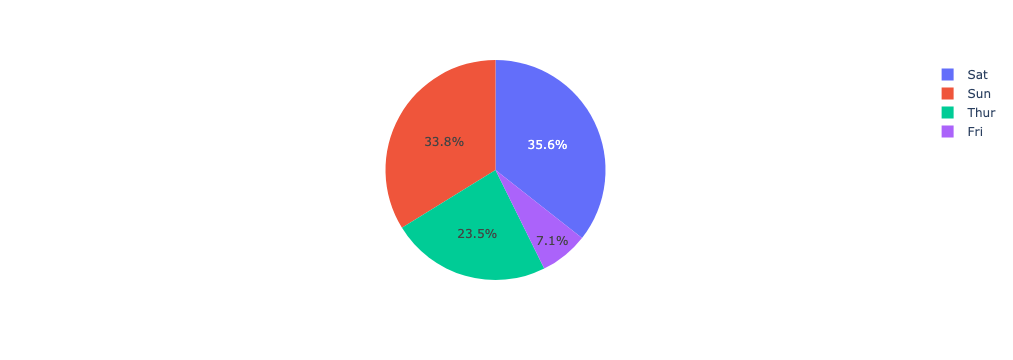

In [119]:
fig = px.pie(tips, values='tip', names='day')
fig.show()

# px.sunburst - Sunburst of a rectangular DF

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


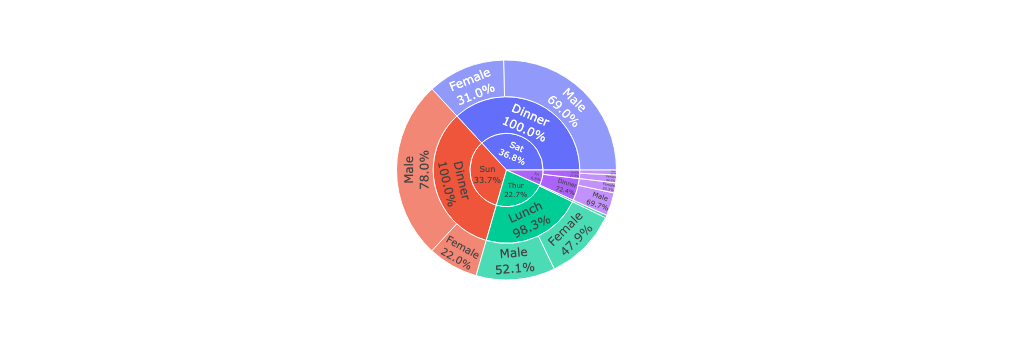

In [39]:
fig = px.sunburst(tips, path=['day', 'time', 'sex'], values='total_bill')
fig.update_traces(texttemplate='%{label}<br>%{percentParent:.1%}')
fig.show()

# px.funnel_area – Funnel plot

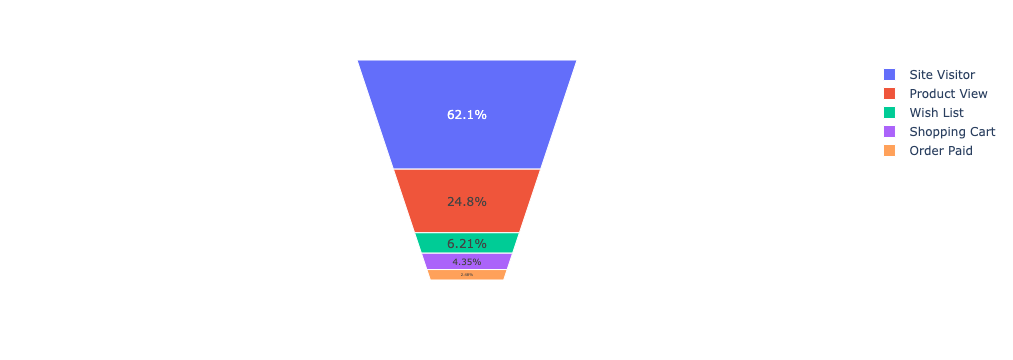

In [121]:
fig = px.funnel_area(names=["Site Visitor","Product View", 
                    "Wish List", "Shopping Cart", "Order Paid"],
                    values=[500, 200, 50, 35, 20])
fig.show()

# px.bar - Bar Chart

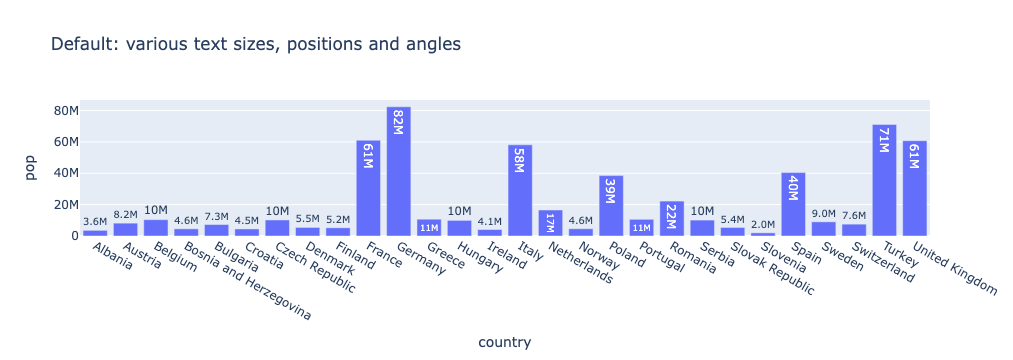

In [227]:
df_pop = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_pop, y='pop', x='country', text_auto='.2s',
            title="Default: various text sizes, positions and angles")
fig.show()

In [41]:
np.where(df_pop.country=='Poland')

(array([17]),)

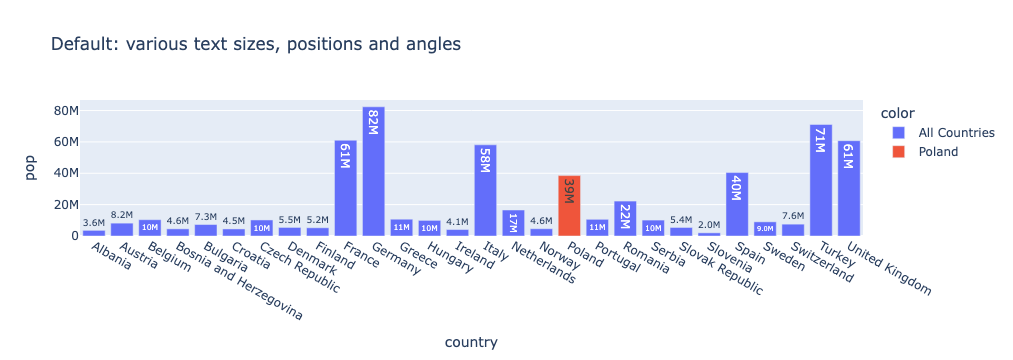

In [40]:
df_pop = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
color_label = np.repeat('All Countries', df_pop.shape[0])
color_label[np.where(df_pop.country=='Poland')] = 'Poland'
fig = px.bar(df_pop, y='pop', x='country', text_auto='.2s', color = color_label,
            title="Default: various text sizes, positions and angles")
fig.update_xaxes(categoryorder='array', categoryarray=df_pop.country)
fig.show()

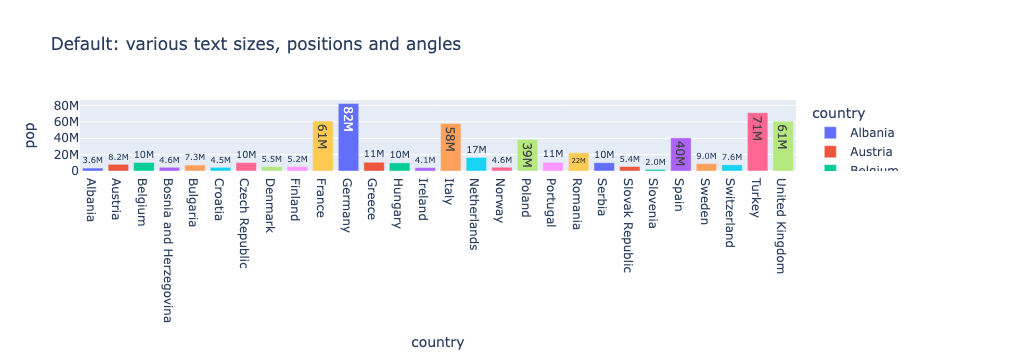

In [42]:
df_pop = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_pop, y='pop', x='country', text_auto='.2s', color='country',
            title="Default: various text sizes, positions and angles")
fig.show()

# 3D scatter plot

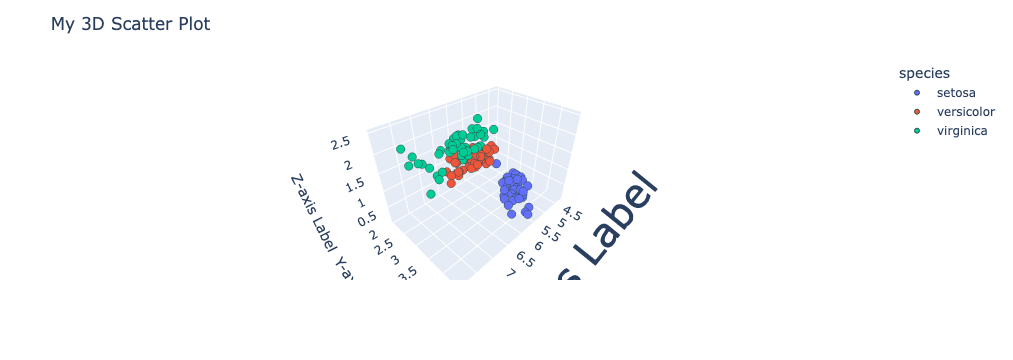

In [245]:
df_iris = px.data.iris()
fig = px.scatter_3d(df_iris, x='sepal_length', 
        y='sepal_width', z='petal_width', color='species')
fig.update_traces( marker=dict(size=5, line=dict(width=1, 
                   color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis Label',
        yaxis_title='Y-axis Label',
        zaxis_title='Z-axis Label',
        xaxis=dict(
            title=dict(
                text='X-axis Label',
                font=dict(size=40)  # Set X-axis label font size
            )
        ),
    ),
    title='My 3D Scatter Plot' # Optional: Add a figure title
)
fig.show()

# px.scatter_geo - Geographical Scatter Plot

In [241]:
px.data.gapminder().year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

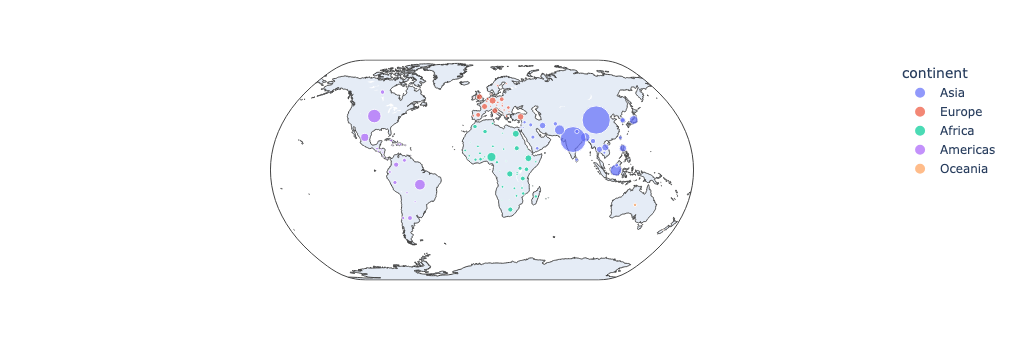

In [126]:
df_geo = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df_geo, locations="iso_alpha",
                     color="continent", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size="pop", # size of markers
                     projection="natural earth")
fig.show()

# px.choropleth

In a choropleth map, each row of data_frame is represented by a colored region mark on a map.
https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

scope (str (default 'world').) – One of 'world', 'usa', 'europe', 'asia', 'africa', 'north america', or 'south america'`Default is `'world' unless projection is set to 'albers usa', which forces 'usa'.

locationmode={['ISO-3', 'USA-states', 'country names', 'geojson-id']}

ISO-3 Alpha Location List: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3

In [127]:
df_exp = px.data.gapminder().query("year==2007")
df_exp.sample(5)

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
1451       Sudan    Africa  2007   58.556  42292929   2602.394995       SDN   
935       Malawi    Africa  2007   48.303  13327079    759.349910       MWI   
1043  Mozambique    Africa  2007   42.082  19951656    823.685621       MOZ   
587        Ghana    Africa  2007   60.022  22873338   1327.608910       GHA   
1631     Uruguay  Americas  2007   76.384   3447496  10611.462990       URY   

      iso_num  
1451      736  
935       454  
1043      508  
587       288  
1631      858

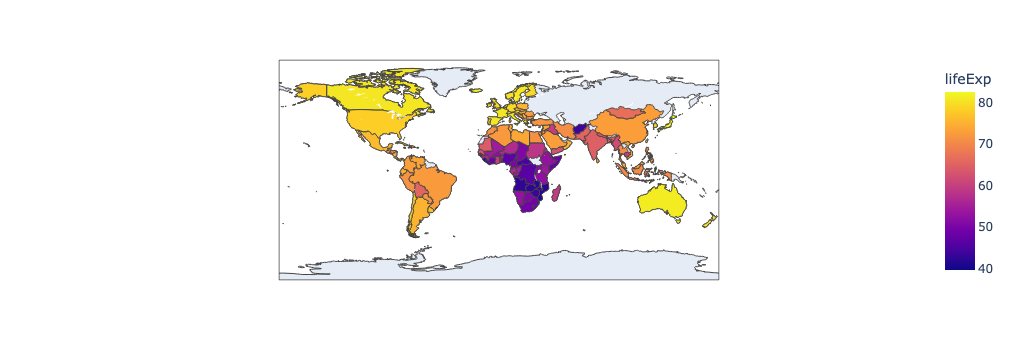

In [128]:
fig = px.choropleth(df_exp, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

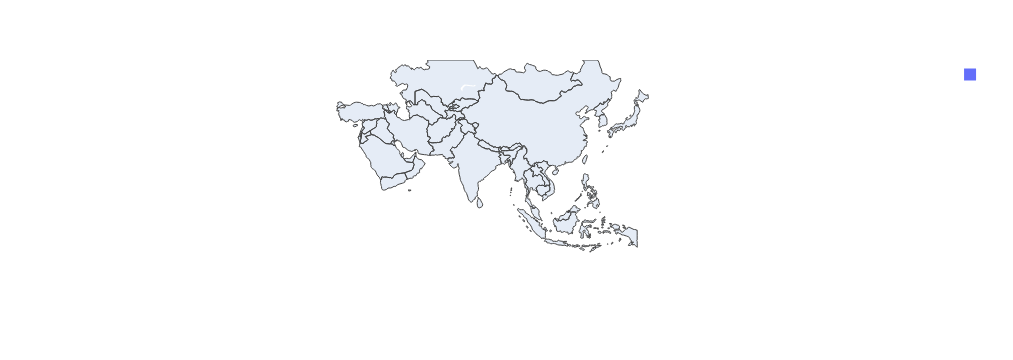

In [129]:
fig = px.choropleth(locationmode = 'country names', locations = ["Hong Kong"], scope="asia" ) 
fig.show()

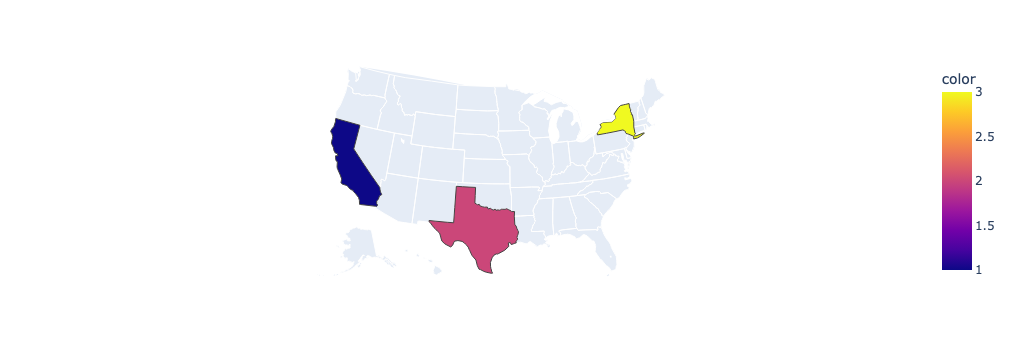

In [130]:
fig = px.choropleth(locations=["CA", "TX", "NY"], locationmode="USA-states", 
                    color=[1,2,3], scope="usa")
fig.show()

# px.treemap

If a color argument is passed, the color of a node is computed as the average of the color values of its children, weighted by their values.

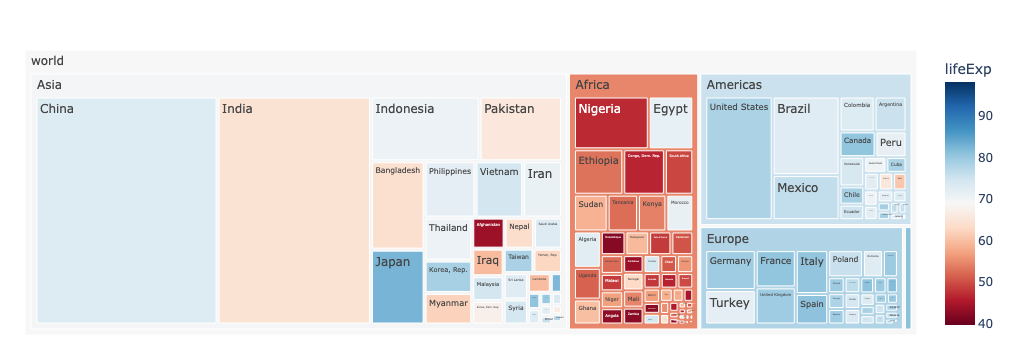

In [131]:
import numpy as np
fig = px.treemap(df_geo, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_geo['lifeExp'], weights=df_geo['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# px.parallel_coordinates

In [132]:
df_iris.sample(5)

sepal_length  sepal_width  petal_length  petal_width     species  \
37            4.9          3.1           1.5          0.1      setosa   
56            6.3          3.3           4.7          1.6  versicolor   
86            6.7          3.1           4.7          1.5  versicolor   
125           7.2          3.2           6.0          1.8   virginica   
143           6.8          3.2           5.9          2.3   virginica   

     species_id  
37            1  
56            2  
86            2  
125           3  
143           3

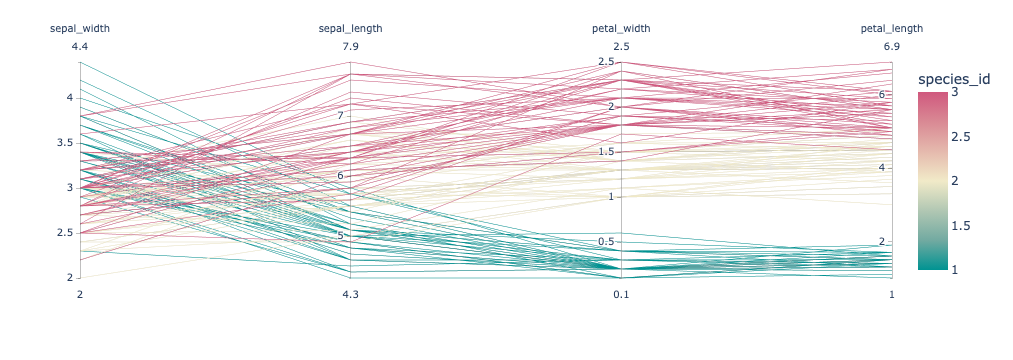

In [133]:
fig = px.parallel_coordinates(df_iris, color="species_id",
                              dimensions=['sepal_width', 'sepal_length', 'petal_width',
                                          'petal_length'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()